# Practica   1.1 Naturaleza de las series de tiempo

**Profesor:** Daniel Jiménez Alcantar

**Alumnos:**
* Artero Andrade Jesús
* García Pérez Maximiliano
* González Luna Diego Amaury
* Rosas Sánchez Edgar Eduardo




Elija un Dataset de su elección, deberá acondicionarla de tal manera que pueda realizar el análisis de una serie de tiempo. Desarrolle un reporte técnico que permita observar el trabajo en los siguientes puntos:

Construir gráfico de la serie de tiempo con los datos del dataset. Explicar el comportamiento.
Hallar  promedio, media, mediana, moda, desviación estándar y varianza.
Identificar granularidad,ciclos, tendencia, estacionalidad, máximo, mínimos, picos, valles, razones de crecimiento y razones de reducción.
Explica cómo se aplica la metodología BOX-Jenkins en su serie de tiempo.

## 1. Importar librerías

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importar datos

In [8]:
data = pd.read_csv("/content/Microsoft_Stock.csv")
print(data)

                    Date    Open    High     Low   Close    Volume
0      4/1/2015 16:00:00   40.60   40.76   40.31   40.72  36865322
1      4/2/2015 16:00:00   40.66   40.74   40.12   40.29  37487476
2      4/6/2015 16:00:00   40.34   41.78   40.18   41.55  39223692
3      4/7/2015 16:00:00   41.61   41.91   41.31   41.53  28809375
4      4/8/2015 16:00:00   41.48   41.69   41.04   41.42  24753438
...                  ...     ...     ...     ...     ...       ...
1506  3/25/2021 16:00:00  235.30  236.94  231.57  232.34  34061853
1507  3/26/2021 16:00:00  231.55  236.71  231.55  236.48  25479853
1508  3/29/2021 16:00:00  236.59  236.80  231.88  235.24  25227455
1509  3/30/2021 16:00:00  233.53  233.85  231.10  231.85  24792012
1510  3/31/2021 16:00:00  232.91  239.10  232.39  235.77  43623471

[1511 rows x 6 columns]


## 3. Construir gráfico de la serie de tiempo con los datos del dataset.

Se tienen las columnas "Date" la cual es la fecha en que se tomó la medición y "Close", que es el precio al que se negoció la última transacción de la acción de Microsoft en un día de mercado.

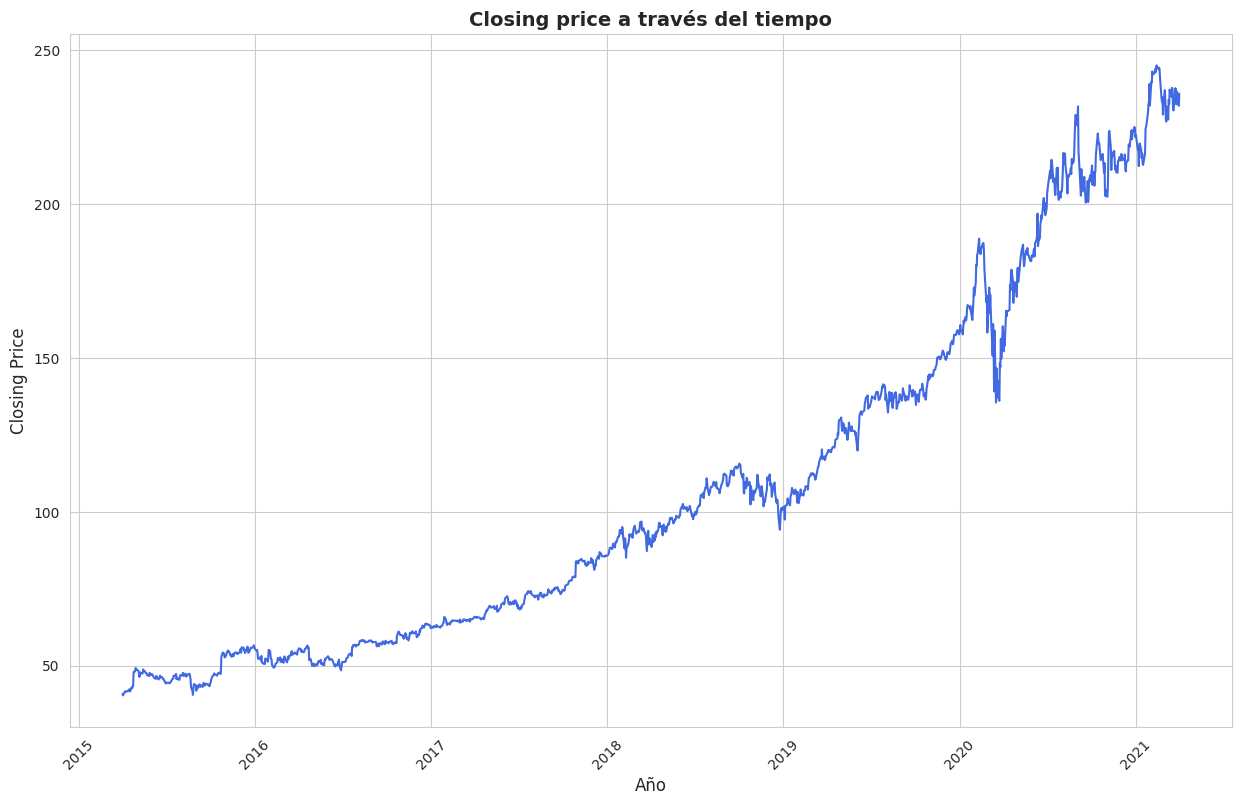

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(15, 9))
sns.set_style("whitegrid")
sns.lineplot(x=data['Date'], y=data['Close'], color='royalblue')

plt.title("Closing price a través del tiempo", fontsize=14, fontweight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

En la gráfica se puede apreciar que el closing price va a la alza al pasar de los años, posteriormente en 2020 se aprecia que tuvo un decremento importante a causo de la pandemia ya que en ese periodo ocurrieron los primeros meses de confinamiento. Posteriormente se retomó la tendencia a la alza de la gráfica, pero con más inestabilidad.

## 4. Hallar  promedio, media, mediana, moda, desviación estándar y varianza.


In [16]:
# Cálculo de estadísticas
columna = 'Close'
promedio = data[columna].mean()
mediana = data[columna].median()
moda = data[columna].mode()[0]
desviacion_std = data[columna].std()
varianza = data[columna].var()
maxi = data[columna].max()
mini = data[columna].min()


print(f"Análisis de la columna: {columna}")
print(f"Promedio: {promedio:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda: {moda:.2f}")
print(f"Desviación Estándar: {desviacion_std:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Máximo: {maxi:.2f}")
print(f"Mínimo: {mini:.2f}")

Análisis de la columna: Close
Promedio: 107.42
Mediana: 93.86
Moda: 62.30
Desviación Estándar: 56.70
Varianza: 3215.15
Máximo: 244.99
Mínimo: 40.29


## 5. Identificar granularidad,ciclos, tendencia, estacionalidad, máximo, mínimos, picos, valles, razones de crecimiento y razones de reducción.

* Granularidad: Los registros de tiempo se dividen en la unidad de días.
* Ciclos: No se aprecian ciclos dentro de la gráfica generada.
* Tendencia: A la alza.
* Estacionalidad: No se observan patrones que se repitan dentro de la gráfica.
* Máximo: 244.99.
* Mínimo: 40.29.
* Picos: Octubre 2018, Febrero 2020 y Octubre 2020.
* Valles: Diciembre 2018 y Marzo 2020.
* Razones de crecimiento: 70%
* Razones de reducción: 30%

## 6. Explica cómo se aplica la metodología BOX-Jenkins en su serie de tiempo.

**Metodología BOX-Jenkins**

1. Identificación del modelo: Antes de identidicar el modelo se debe de verificar la estacionalidad o no estacionalidad de la serie de tiempo. Posteriormente, se procede a identificar el modelo, analizando los correlogramas.
2. Estimación de parámetros: De acuerdo con el modelo elegido, se deben de ajustar los parámetros necesarios para que el modelo sea insesgado.
3. Diágnostico comparativo: En esta etapa se analiza y se decide si nuestro modelo es estadísticamente adecuado. Por lo cual se deben de realizar una de las dos pruebas: una de autocorrelación de los residuales y otra de ruido blanco.
4. En esta etapa se identifica, estima y verifica el modelo estimado, y se pueden realizar pronósticos dependiendo de la granularidad que se quiera estudiar.